# Tarea N°02

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Diego Nicolás Hipólito Mera Muñoz

* __Rol__: 201511502-8

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [16]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
    
%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [6]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int32
 1   c01     1797 non-null   int32
 2   c02     1797 non-null   int32
 3   c03     1797 non-null   int32
 4   c04     1797 non-null   int32
 5   c05     1797 non-null   int32
 6   c06     1797 non-null   int32
 7   c07     1797 non-null   int32
 8   c08     1797 non-null   int32
 9   c09     1797 non-null   int32
 10  c10     1797 non-null   int32
 11  c11     1797 non-null   int32
 12  c12     1797 non-null   int32
 13  c13     1797 non-null   int32
 14  c14     1797 non-null   int32
 15  c15     1797 non-null   int32
 16  c16     1797 non-null   int32
 17  c17     1797 non-null   int32
 18  c18     1797 non-null   int32
 19  c19     1797 non-null   int32
 20  c20     1797 non-null   int32
 21  c21     1797 non-null   int32
 22  c22     1797 non-null   int32
 23  c23     1797 

- Gracias al uso del comando .info() podemos saber que los datos no presentan valores nulos, se trata de datos tipo int32 y que el uso de memoria es de 456.4 KB.

In [7]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


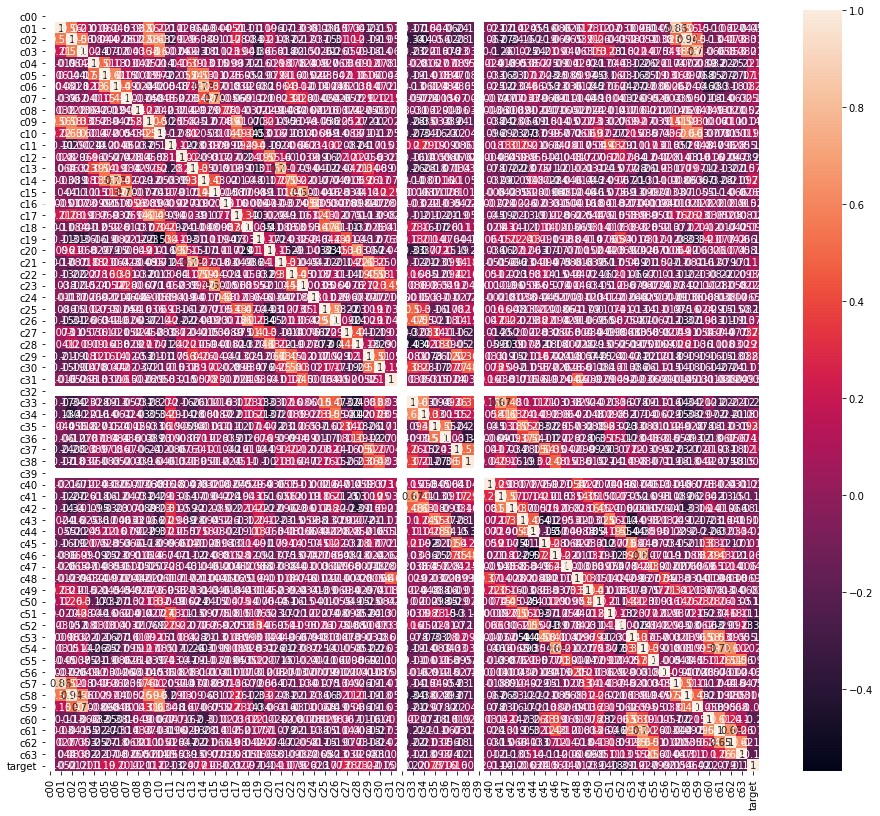

In [8]:
# Para revisar la correlación se trabaja con un mapa de calor a través de seaborn. 
# Se utiliza el método de correlación de pearson.

corr_df = digits.corr(method='pearson')
plt.figure(figsize=(16, 14))
sns.heatmap(corr_df, annot=True)
plt.show()

In [9]:
digits.isnull().any().describe()

count        65
unique        1
top       False
freq         65
dtype: object

- Se revisa la existencia de valores nulos en el dataframe. Se aprecia que no existe ninguno, por tanto, podemos proceder sin problemas.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [10]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

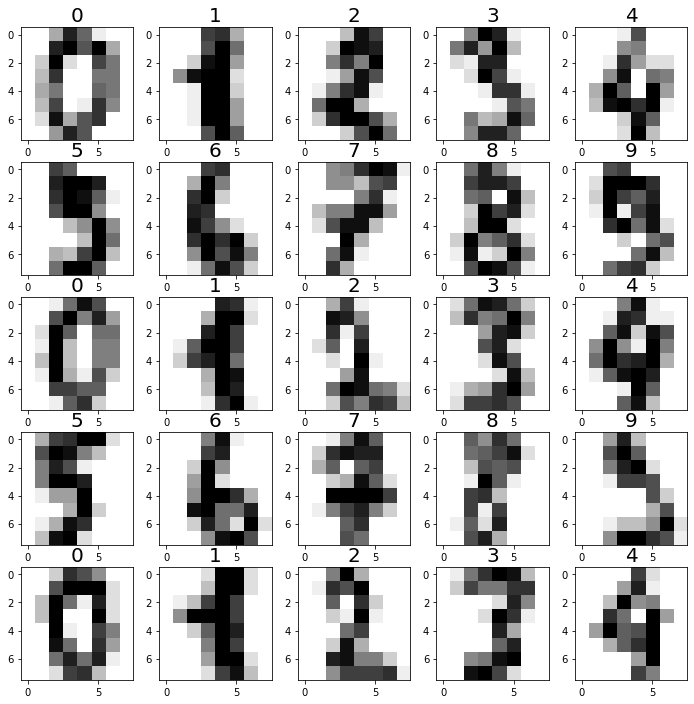

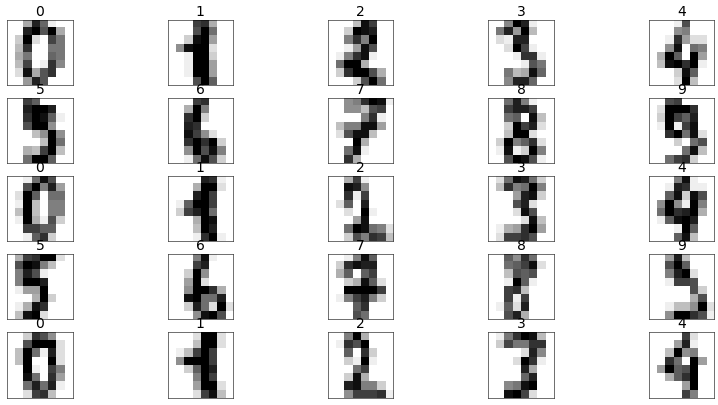

In [11]:
groups = range(1, 25 + 1)
aux = digits['target'].to_numpy()
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i, ax in zip(groups, axs.ravel()):
    ax.imshow(digits.iloc[i-1,:-1].to_numpy().reshape((8, 8, 1)), cmap='binary')
    ax.set_title(f"Grupo {i-1}")
    ax.set_title(aux[i-1],size = 20)

# Se puede realizar lo mismo con plt.

plt.rcParams['figure.dpi'] = 50
plt.figure(figsize=(20, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.iloc[i,:-1].to_numpy().reshape((8, 8, 1)), cmap='binary')
    plt.title(digits['target'][i],size = 20)
plt.show()



### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [12]:
X = digits.drop(columns="target").values
y = digits["target"].values

**Train Test**

In [13]:
# Crear conjunto de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  1797
numero de filas train set     :  1437
numero de filas test set      :  360


**Modelo**

In [14]:
# Se separa en data sets de testeo y de entrenamiento.
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

def summary_metrics(ytest,xtest,model,name) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true =  list(ytest)
    y_pred = list(model.predict(xtest))
    
    matrix = confusion_matrix(y_true,y_pred)

    df_result['accuracy'] = [round(accuracy_score(y_true,y_pred),4)]
    df_result['recall'] = [round(recall_score(y_true,y_pred, average="macro"),4)]
    df_result['precision'] = [round(precision_score(y_true,y_pred, average="macro"),4)]
    df_result['fscore'] = [round(f1_score(y_true,y_pred, average="macro"),4)]
    df_result['Model'] = name

    return df_result,matrix

# Se genera una función para evaluar el modelo en base a las métricas que van de 0 a 1.
frames = []
Matriz = []
def model_evaluate(model,name):
    model.fit(xtrain,ytrain)
    [df,matrix] = summary_metrics(ytest,xtest,model,name)
    frames.append(df)
    Matriz.append(matrix.tolist())
    
# Lista de modelos a probar.
lr=LogisticRegression(solver='liblinear')
svm=SVC()
dt=DecisionTreeClassifier(max_depth=100)
rf=RandomForestClassifier(max_samples=0.9)
knn=KNeighborsClassifier(n_neighbors=5)

models=[lr,svm,dt,rf,knn]
names = ["Logistic Prev","RBF SVM Prev","Decision Tree Prev","Random Forest Prev","KNeighbors Prev"]

# Evaluación de los modelos.
for i in range(5):
    model_evaluate(models[i],names[i])

result_prev = pd.concat(frames, sort='False', ignore_index='True')
result_prev

,Model,accuracy,fscore,precision,recall
0,Logistic Prev,0.9722,0.9699,0.9702,0.9705
1,RBF SVM Prev,0.9833,0.9823,0.9844,0.9814
2,Decision Tree Prev,0.8694,0.8682,0.8713,0.8704
3,Random Forest Prev,0.9861,0.9853,0.9858,0.9855
4,KNeighbors Prev,0.9778,0.9771,0.9791,0.9759


In [100]:
for i in range(5):
    texto = names[i]
    print("Matriz de Confusión Método ", end=f"{texto}")
    print('\n')
    print(np.asarray(Matriz[0]))
    print('\n')

Matriz de Confusión Método Logistic

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  1  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  2  0  0 34  0  1]
 [ 0  0  0  0  0  1  0  0 27  1]
 [ 0  0  0  0  0  1  0  0  1 32]]


Matriz de Confusión Método RBF SVM

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  1  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  2  0  0 34  0  1]
 [ 0  0  0  0  0  1  0  0 27  1]
 [ 0  0  0  0  0  1  0  0  1 32]]


Matriz de Confusión Método Decision Tree

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  1  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0  0 3

**Mejor estimación de los parámetros para LogisticRegression**

* Esto toma tiempo, para los ajustes próximos se va a trabajar con menos hiperparámetros

In [17]:
from sklearn.pipeline import Pipeline
name = "Logistic"
# Determinar los parámetros a variar
#tuned_parameters = {'C': [0.001,0.01,0.1,1,10,100,1000]}

pipe = Pipeline([('scale', StandardScaler()),
    ('mnl', LogisticRegression(fit_intercept=True, multi_class="multinomial"))])

param_grid = [{'mnl__solver': ['newton-cg', 'lbfgs','sag', 'saga','liblinear'],
               'mnl__C':[0.001,0.01,0.1,1,10,100,1000],
               'mnl__class_weight':[None,'balanced'],
              'mnl__max_iter':[1000,2000,3000],
              'mnl__penalty':['l1','l2']}]

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
clf = GridSearchCV(estimator = pipe, param_grid=param_grid, scoring='accuracy', n_jobs=-1, refit='neg_log_loss', cv=3, verbose=2, return_train_score=True)

# Ajustar el modelo a los datos de entrenamiento
best_model = clf.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(clf.best_params_)

# Métricas y Matriz de confusión
[df_1,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_1)
print("")

Fitting 3 folds for each of 420 candidates, totalling 1260 fits

Los mejores parámetros encontrados son:
 
{'mnl__C': 1, 'mnl__class_weight': None, 'mnl__max_iter': 1000, 'mnl__penalty': 'l2', 'mnl__solver': 'newton-cg'}

Matriz de confusion:
 
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  1]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  1  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  1  0 36  0  0]
 [ 0  0  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  1  0  0  0 33]]

Metricas:
 
   accuracy  recall  precision  fscore     Model
0    0.9833  0.9814     0.9821  0.9817  Logistic



C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
630 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
126 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(sel

**Mejor estimación de los parámetros para SVC**

In [18]:
name = "RBF SVM"
# Determinar el rango de C en el que se quiere buscar
Cs = [0.001, 0.01, 0.1 ,1, 10, 100, 1000, 10000]

# Determinar el rango de gammas en el que se quiere buscar
gammas = [0.00000001 ,0.00000001 ,0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 , 1, 10, 100, 1000]

# Crear el diccionario
param_grid = {'C': Cs, 'gamma': gammas}

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
grid_search = GridSearchCV(SVC(kernel='poly'),param_grid,cv=3)

# Ajustar el modelo a los datos de entrenamiento
best_model = grid_search.fit(xtrain,ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(grid_search.best_params_)
    
# Métricas y Matriz de confusión
[df_2,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_2)
print("")


Los mejores parámetros encontrados son:
 
{'C': 0.001, 'gamma': 1}

Matriz de confusion:
 
[[42  0  0  0  0  0  0  0  1  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  1  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  0 34]]

Metricas:
 
   accuracy  recall  precision  fscore    Model
0    0.9889  0.9883      0.988  0.9878  RBF SVM



**Mejor estimación de los parámetros para Decision Tree**

In [19]:
name = "Decision Tree"

# Determinar los parámetros a variar
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=3)

# Ajustar el modelo a los datos de entrenamiento
best_model = clf.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(clf.best_params_)

# Métricas y Matriz de confusión
[df_3,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_3)
print("")


Los mejores parámetros encontrados son:
 
{'criterion': 'gini', 'max_depth': 70}

Matriz de confusion:
 
[[40  0  0  0  1  1  0  0  1  0]
 [ 0 28  1  1  1  1  0  0  2  1]
 [ 0  0 32  1  0  0  0  0  2  1]
 [ 0  0  2 32  0  0  0  2  1  4]
 [ 0  1  0  0 33  2  0  2  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  1  0  0  0 35  0  1  0]
 [ 0  0  1  1  3  0  0 31  0  1]
 [ 0  0  0  1  0  1  0  1 26  0]
 [ 0  2  0  1  0  3  0  3  0 25]]

Metricas:
 
   accuracy  recall  precision  fscore          Model
0    0.8639   0.865     0.8625  0.8617  Decision Tree



**Mejor estimación de los parámetros para Random forest**

In [20]:
name = "Random Forest"

# Determinar los parámetros a variar
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)

# Ajustar el modelo a los datos de entrenamiento
best_model = CV_rfc.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(CV_rfc.best_params_)

# Métricas y Matriz de confusión
[df_4,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_4)
print("")


Los mejores parámetros encontrados son:
 
{'max_features': 'auto', 'n_estimators': 200}

Matriz de confusion:
 
[[41  0  0  0  2  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  1  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  0  0  0 28  1]
 [ 0  0  0  0  0  1  0  0  0 33]]

Metricas:
 
   accuracy  recall  precision  fscore          Model
0    0.9806  0.9805     0.9806  0.9802  Random Forest



**Mejor estimación de los parámetros para KNeighbors**

In [21]:
name = "KNeighbors"

# Determinar los parámetros a variar
nFolds = 3
metrics       = ['minkowski','euclidean','manhattan'] 
weights       = ['uniform','distance'] #10.0**np.arange(-5,4)
numNeighbors  = np.arange(5,10)

# Crear el diccionario
param_grid    = dict(metric=metrics,weights=weights,n_neighbors=numNeighbors)

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=nFolds)

# Ajustar el modelo a los datos de entrenamiento
best_model = grid.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(grid.best_params_)

# Métricas y Matriz de confusión
[df_5,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_5)
print("")


Los mejores parámetros encontrados son:
 
{'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'distance'}

Matriz de confusion:
 
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  1  1  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  1  0  0  0 29  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  1  0  1  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0 34]]

Metricas:
 
   accuracy  recall  precision  fscore       Model
0    0.9806  0.9789     0.9805  0.9794  KNeighbors



In [22]:
result = pd.concat([df_1,df_2,df_3,df_4,df_5], sort='False', ignore_index='True')
result

,Model,accuracy,fscore,precision,recall
0,Logistic,0.9833,0.9817,0.9821,0.9814
1,RBF SVM,0.9889,0.9878,0.9880,0.9883
2,Decision Tree,0.8639,0.8617,0.8625,0.8650
3,Random Forest,0.9806,0.9802,0.9806,0.9805
4,KNeighbors,0.9806,0.9794,0.9805,0.9789


**Ahora que ya tenemos los resultados previos y los optimizados procedemos a unir y comparar.**

In [23]:
# Unir data frames
result_final = pd.concat([result_prev,result], sort='False', ignore_index='True')
df1 = result_final.iloc[[0,5]]
df2 = result_final.iloc[[1,6]]
df3 = result_final.iloc[[2,7]]
df4 = result_final.iloc[[3,8]]
df5 = result_final.iloc[[4,9]]

**Logistic**

In [24]:
df1.sort_values(['accuracy','precision'],ascending=False)

,Model,accuracy,fscore,precision,recall
5,Logistic,0.9833,0.9817,0.9821,0.9814
0,Logistic Prev,0.9722,0.9699,0.9702,0.9705


**RBF SVM**

In [25]:
df2.sort_values(['accuracy','precision'],ascending=False)

,Model,accuracy,fscore,precision,recall
6,RBF SVM,0.9889,0.9878,0.9880,0.9883
1,RBF SVM Prev,0.9833,0.9823,0.9844,0.9814


**Decision Tree**

In [26]:
df3.sort_values(['accuracy','precision'],ascending=False)

,Model,accuracy,fscore,precision,recall
2,Decision Tree Prev,0.8694,0.8682,0.8713,0.8704
7,Decision Tree,0.8639,0.8617,0.8625,0.8650


**Random Forest**

In [27]:
df4.sort_values(['accuracy','precision'],ascending=False)

,Model,accuracy,fscore,precision,recall
3,Random Forest Prev,0.9861,0.9853,0.9858,0.9855
8,Random Forest,0.9806,0.9802,0.9806,0.9805


**KNeighbors**

In [28]:
df5.sort_values(['accuracy','precision'],ascending=False)

,Model,accuracy,fscore,precision,recall
9,KNeighbors,0.9806,0.9794,0.9805,0.9789
4,KNeighbors Prev,0.9778,0.9771,0.9791,0.9759


* Los resultados fueron ordenamos en base a la exactitud y la precisión.
    * Se concluye que para todos los modelos fue posible optimizar los hiperparámetros, y por consiguiente, obtener mejores resultados

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [32]:
result_final.sort_values(['accuracy','fscore','precision','recall'],ascending=False)

,Model,accuracy,fscore,precision,recall
6,RBF SVM,0.9889,0.9878,0.9880,0.9883
3,Random Forest Prev,0.9861,0.9853,0.9858,0.9855
1,RBF SVM Prev,0.9833,0.9823,0.9844,0.9814
5,Logistic,0.9833,0.9817,0.9821,0.9814
8,Random Forest,0.9806,0.9802,0.9806,0.9805
9,KNeighbors,0.9806,0.9794,0.9805,0.9789
4,KNeighbors Prev,0.9778,0.9771,0.9791,0.9759
0,Logistic Prev,0.9722,0.9699,0.9702,0.9705
2,Decision Tree Prev,0.8694,0.8682,0.8713,0.8704
7,Decision Tree,0.8639,0.8617,0.8625,0.8650


- Ordenando la tabla resumen con todos los modelos podemos observar que el que mejor resultados entrega es RBF SVM con los parámetros optimizados.

### Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
model = SVC(kernel='poly', C=0.001, gamma= 1)

clf = svm.model
scores = cross_val_score(clf, X, y, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.97 accuracy with a standard deviation of 0.02


In [51]:
cv_results = cross_val_score(model, X, y, cv=10)
print(cv_results.mean())
print(cv_results.std())

0.9771787709497206
0.018527725755168832


### Curva de Validación

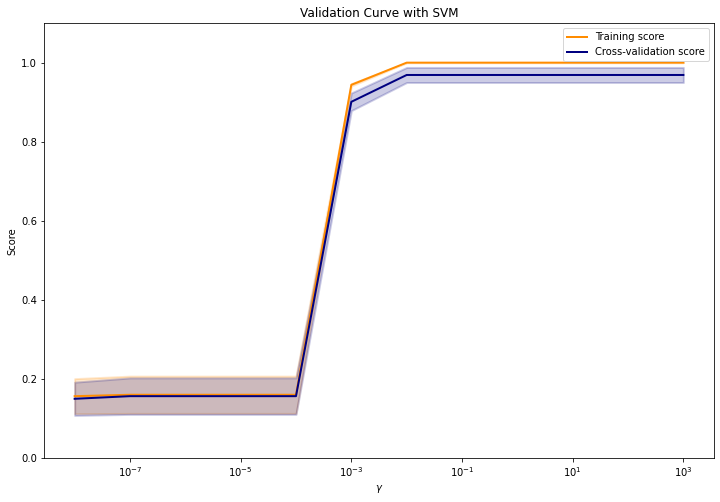

In [54]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve


param_range = [0.00000001 ,0.00000001 ,0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 , 1, 10, 100, 1000]
train_scores, test_scores = validation_curve(
    SVC(kernel='poly', C=0.001),
    X,
    y,
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=1,
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 8)) 
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

- En este gráfico, se pueden ver los puntajes de entrenamiento y los puntajes de validación de la SVM para diferentes valores del parámetro gamma del kernel. Para valores muy bajos de gamma, puede ver que tanto la puntuación de entrenamiento como la puntuación de validación son bajas. A esto se le llama desajuste. Los valores medios de gamma darán como resultado valores altos para ambas puntuaciones, es decir, el clasificador se está desempeñando bastante bien. Si la gamma es demasiado alta, el clasificador se ajustará en exceso, lo que significa que la puntuación de entrenamiento es buena pero la puntuación de validación es mala.

### Curva AUC–ROC

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel='poly', C=0.001, gamma= 1)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

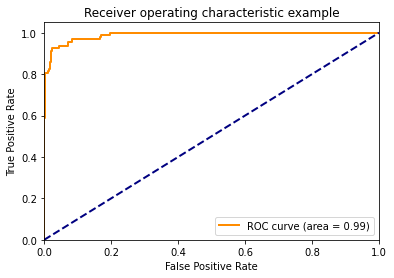

In [63]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

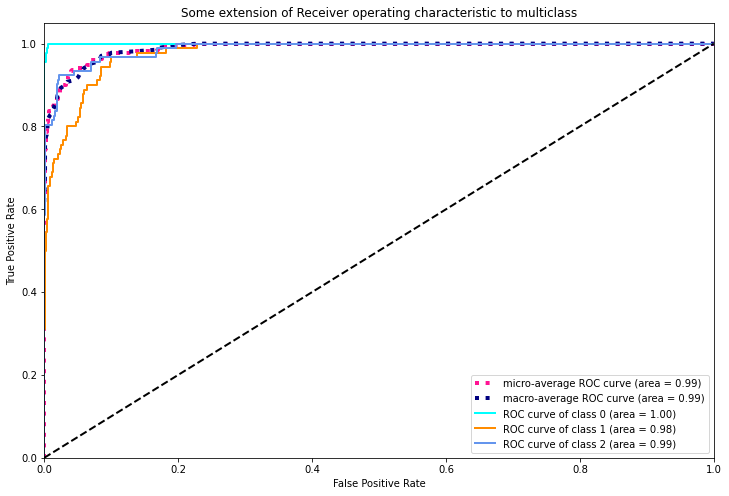

In [67]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 8)) 
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [ ]:
## FIX ME PLEASE

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [ ]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

In [ ]:
## FIX ME PLEASE

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

## II.- California Housing Prices


<img src="https://www.wartsila.com/images/default-source/default-album/california_housing.tmb-1920x690.jpg?sfvrsn=126bc44_1" width="480" height="240" align="center"/>

Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad. 
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo 
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Puede tomar como referencia lo realizado en la sección **I.- Clasificación de dígitos**. El alumno tiene la libertad de desarrollar un análisis más completo del problema (si así lo desea). Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [4]:
# read data
housing = pd.read_csv('data/housing.csv',sep=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
## FIX ME PLEASE